In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np

In [32]:
import time

starting_time = time.time()
data = pd.read_csv('RAVTESS_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.05395197868347168ms
   Unnamed: 0    0           1          2          3          4          5  \
0        2642  0.0 -450.444153  31.821642 -36.853058   3.524392  -5.175694   
1        3392  0.0 -305.174255  40.323029  -9.351065  31.671879 -17.789635   
2        7977  0.0 -546.611389  89.431557  30.264193  22.876518  10.881158   
3        7485  0.0 -460.262665  97.096466  21.472469 -12.220604  -6.570318   
4        2913  0.0 -567.392944  77.169067 -19.185984  12.959229   9.280185   

           6          7          8  ...         32         33         34  \
0 -15.189813  -9.737331  -9.731072  ...   4.388540  -2.914866  -4.391418   
1   2.409657 -11.379353 -11.372132  ...   5.941274  -0.823913   0.157705   
2  17.330706 -11.609023  -2.967377  ...  13.264074  10.730732  12.294745   
3   5.980837  -7.818426   2.122841  ...   2.945964   1.446232   2.478948   
4  -0.218544  -7.754282  -7.311463  ...   2.998896   2.279885   2.827719   

          35        36         37    

In [33]:
data.shape

(8052, 43)

In [34]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', 'emotion'],
      dtype='object')

In [35]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [36]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', 'emotion'],
      dtype='object')

In [37]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

## SVM

Implementing SVM with Scikit-Learn


In [38]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
X.shape, y.shape

((8052, 41), (8052,))

In [41]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.


In [43]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:


In [44]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 56.51158094406128 ms 


To make predictions, the predict method of the SVC class is used.


In [45]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

['fear' 'fear' 'fear' ... 'disgust' 'angry' 'happy']


Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.
We have used the following code for finding these metrics:


In [46]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

       angry       0.80      0.87      0.83       238
        calm       0.55      0.76      0.64        75
     disgust       0.83      0.82      0.83       203
        fear       0.76      0.83      0.80       239
       happy       0.79      0.75      0.77       240
     neutral       0.93      0.87      0.90       208
         sad       0.83      0.79      0.81       213
   surprised       0.95      0.80      0.87       195

    accuracy                           0.82      1611
   macro avg       0.81      0.81      0.81      1611
weighted avg       0.82      0.82      0.82      1611

----accuracy score 81.56424581005587 ----


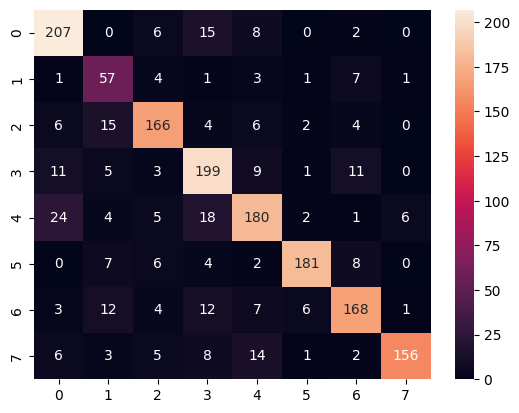

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data


In [51]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 84.7849712777519 ----
----test accuracy score 81.56424581005587 ----


## Cross-Validation


5-fold cross validation of the dataset with the SVC classifier.


In [52]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.81688392 0.8106766  0.81801242 0.80931677 0.82608696]


## Scaling

When performing the linear SVM classification, it is often helpful to normalize the training data, for example by subtracting the mean and dividing by the standard deviation, and afterwards scale the test data with the mean and standard deviation of training data.


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.8919925512104283
Accuracy without Scaling: 0.8280571073867163


### Generalization check

Checking for overfitting or underfitting by comparing the training and testing scores of the model


In [54]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 91.36780003105109 ----
----test accuracy score 89.19925512104282 ----


In [55]:
scaled_predictions = svc_scaled.predict(X_test)

### Classification reports and Confusion Matrix


              precision    recall  f1-score   support

       angry       0.94      0.92      0.93       225
        calm       0.69      0.84      0.76        89
     disgust       0.85      0.91      0.88       207
        fear       0.92      0.88      0.90       232
       happy       0.94      0.87      0.90       234
     neutral       0.98      0.89      0.93       182
         sad       0.85      0.88      0.87       242
   surprised       0.89      0.92      0.90       200

    accuracy                           0.89      1611
   macro avg       0.88      0.89      0.88      1611
weighted avg       0.90      0.89      0.89      1611

----accuracy score 89.19925512104282 ----


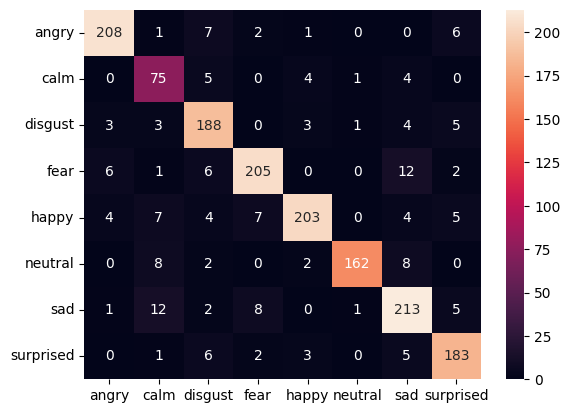

In [64]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
labels = ["angry", "calm", "disgust", "fear", "happy", "neutral", "sad", "surprised"]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

#### Cross Validation


In [57]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, X, y, cv = 5)
print(cv_results)

[0.89819988 0.88454376 0.89192547 0.88322981 0.90248447]
